In [1]:
prepath='./'
    
#Import the necessary packages
import sys
sys.path.append(prepath+'scripts')
from metadata_2019_06_17 import *
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy import stats
import pickle as pkl
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
mpl.rcParams['figure.dpi']=250

masterDF=pd.read_csv(prepath+'scripts/2020_02_28_MasterDF.csv',index_col=0)
cleanDF=masterDF[(masterDF['Contamination?']=='No')&(masterDF['HB']!=1)]
for z in list(cleanDF.index.values):
    numspecies=0
    for species in phylogeny:            
        if cleanDF.at[z,species]==1:
            numspecies+=1
    cleanDF.at[z,'NumSpecies']=numspecies
    mystring=''
    for species in bpbspecies:
        if cleanDF.at[z,species]==1:
            if mystring=='':
                mystring=mystring+species
            else:
                mystring=mystring+'-'+species
    cleanDF.at[z,'BPBSet']=mystring
    s=0
    for species in bpbspecies:
        s+=cleanDF.at[z,species]
    if s==numspecies and s>2 and '-' in cleanDF.at[z,'Treatment']:
        bpbincluded=cleanDF.at[z,'Treatment'].split('-')
        mystring=''
        for species in phylogeny:
            if species in bpbincluded:
                if mystring=='':
                    mystring=species
                else:
                    mystring=mystring+'-'+species
        cleanDF.at[z,'Treatment']=mystring
    if cleanDF.at[z,'Treatment']=='COMM8':
        cleanDF.at[z,'Treatment']='FP-AC-ER-RI-CC'
for species in phylogeny:
    cleanDF[species+' OD']=cleanDF[species+' Fraction']*cleanDF['OD']
plotpath='plots/'+datetime.date.today().strftime("%Y_%m_%d_")

/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [2]:
validationset=['PC-BV-BO-BU-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-BV-BA-BP-CA-EL-FP-AC-CG-ER-RI-CC-DF', 'BY-DP-BP-FP-AC-BH-CG-ER-RI-CC-DL', 'PC-BV-BO-BY-BL-BA-BP-FP-CH-AC-CG-ER-RI-CC-DF', 'BV-BU-BL-BA-BP-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-PJ-BL-EL-FP-AC-BH-ER-RI-CC-DF', 'PC-PJ-BY-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-PJ-BY-DP-BL-BA-FP-CH-AC-BH-ER-RI-CC-DL', 'PC-BC-DP-BP-EL-FP-AC-CG-ER-RI-CC-DL', 'PC-PJ-BO-BL-EL-FP-AC-BH-ER-RI-CC', 'PJ-BY-BU-BL-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BO-BL-EL-FP-CH-AC-ER-RI-CC-DF', 'PJ-BY-BA-BP-CA-FP-CH-AC-BH-ER-RI-CC-DF', 'PC-PJ-BV-BO-BL-FP-AC-BH-ER-RI-CC', 'PC-PJ-BV-BU-BL-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'BV-BO-BL-BA-BP-CA-EL-FP-AC-BH-CG-ER-RI-CC', 'PC-PJ-BV-BO-BL-FP-CH-AC-ER-RI-CC', 'BY-BU-BA-BP-CA-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BV-BO-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'BY-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BV-BO-BY-BL-BA-BP-FP-CH-AC-CG-ER-RI-CC', 'PC-BV-BL-BA-BP-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-PJ-BV-BL-BA-FP-AC-ER-RI-CC-DF', 'PJ-BU-BA-CA-FP-CH-AC-BH-ER-RI-CC', 'PC-BV-BO-BC-BY-DP-BL-BP-FP-CH-AC-ER-RI-CC-DL', 'PJ-BV-BY-DP-BP-FP-AC-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BC-DP-BL-FP-AC-ER-RI-CC-DL', 'BO-BC-BY-DP-FP-AC-BH-ER-RI-CC-DL', 'BO-BA-BP-CA-FP-CH-AC-BH-CG-ER-RI-CC-DF', 'BV-BU-BA-BP-CA-EL-FP-AC-CG-ER-RI-CC-DF', 'PC-BL-CA-EL-FP-CH-AC-BH-ER-RI-CC', 'BV-BC-DP-EL-FP-CH-AC-BH-ER-RI-CC-DF', 'PC-BC-BY-BU-DP-BL-BP-FP-AC-ER-RI-CC-DL', 'BY-DP-BP-CA-FP-AC-BH-CG-ER-RI-CC-DL', 'PJ-BC-DP-CA-FP-CH-AC-ER-RI-CC-DL-DF', 'PJ-BC-DP-BA-FP-CH-AC-BH-ER-RI-CC-DL', 'PC-BO-DP-BP-FP-AC-BH-CG-ER-RI-CC-DL', 'BV-BC-DP-EL-FP-CH-AC-ER-RI-CC-DF', 'BV-BO-BL-CA-EL-FP-AC-BH-ER-RI-CC', 'PC-BO-CA-FP-CH-AC-BH-ER-RI-CC-DF', 'PJ-BV-BO-BL-BA-CA-FP-CH-AC-ER-RI-CC-DF', 'PC-PJ-BA-CA-EL-FP-AC-BH-ER-RI-CC', 'PC-PJ-BC-DP-FP-AC-BH-ER-RI-CC-DF', 'PC-BV-BO-EL-FP-CH-AC-ER-RI-CC-DF', 'PJ-BV-BU-BL-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BV-BO-BA-BP-FP-AC-CG-ER-RI-CC-DF', 'PJ-BO-BY-BA-BP-FP-AC-ER-RI-CC-DF', 'PJ-BC-DP-BL-FP-AC-BH-ER-RI-CC-DF', 'BO-BC-DP-BP-CA-FP-CH-AC-BH-CG-ER-RI-CC-DL-DF', 'BV-BC-DP-BP-CA-FP-AC-BH-CG-ER-RI-CC-DL', 'PJ-BV-BO-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'PJ-BU-BL-BA-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PJ-BV-BC-DP-FP-CH-AC-ER-RI-CC-DF', 'PJ-BY-DP-BP-FP-AC-BH-ER-RI-CC-DL', 'BV-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-PJ-BV-BO-BC-BY-DP-BL-BP-FP-CH-AC-ER-RI-CC-DL', 'PC-PJ-BO-BY-DP-BP-EL-FP-AC-BH-ER-RI-CC-DL', 'PC-BO-BY-BL-BA-BP-FP-AC-ER-RI-CC-DF', 'PC-BU-BA-CA-FP-AC-BH-ER-RI-CC-DF', 'PJ-BO-BY-BA-BP-FP-AC-BH-ER-RI-CC-DF', 'PC-BV-BO-BL-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PJ-BF-BC-BY-DP-FP-AC-BH-ER-RI-CC', 'BV-BU-BA-CA-EL-FP-AC-BH-ER-RI-CC-DF', 'PC-PJ-BV-BC-DP-FP-CH-AC-ER-RI-CC-DF', 'PC-BV-BO-BU-CA-EL-FP-CH-AC-ER-RI-CC-DF', 'BO-BC-DP-BP-FP-AC-CG-ER-RI-CC-DL-DF', 'PJ-BO-BY-BA-BP-EL-FP-AC-BH-CG-ER-RI-CC', 'PC-PJ-BL-BA-CA-FP-AC-BH-ER-RI-CC', 'PJ-BO-BY-DP-BA-BP-FP-AC-BH-ER-RI-CC-DL', 'PJ-BT-BC-BY-DP-FP-AC-BH-ER-RI-CC', 'PC-PJ-BV-BO-CA-FP-AC-BH-ER-RI-CC', 'PC-PJ-BO-BY-BL-BA-BP-EL-FP-AC-BH-CG-ER-RI-CC', 'BY-DP-CA-FP-CH-AC-BH-ER-RI-CC-DL', 'PC-PJ-BL-BA-CA-EL-FP-CH-AC-BH-ER-RI-CC', 'PC-PJ-BV-BA-CA-FP-AC-ER-RI-CC-DF', 'PC-PJ-BL-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-BV-BO-BL-FP-CH-AC-ER-RI-CC-DF', 'PC-PJ-BV-BO-BA-FP-AC-ER-RI-CC-DF', 'BY-BA-BP-CA-FP-AC-BH-ER-RI-CC-DF', 'BO-BL-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DL-DF', 'PC-PJ-BV-BA-FP-AC-BH-ER-RI-CC-DF', 'PC-PJ-BV-BU-BL-BA-FP-AC-ER-RI-CC']
validationset2=['PC-BV-BF-BT-BC-BY-BU-BA-BP-CA-FP-BH-CG-ER-RI-CC-DL-DF', 'PC-BF-BT-BC-BU-BA-EL-FP-CG-ER-RI-CC-DL', 'PC-PJ-BF-BO-BY-DP-BL-BA-EL-FP-BH-CG-ER-RI-CC-DF', 'PJ-BV-BO-BU-EL-FP-BH-ER-RI-CC-DF', 'PC-PJ-BV-BU-BP-CA-FP-CG-ER-RI-CC-DF', 'PC-PJ-DP-BP-CA-FP-BH-ER-RI-CC-DF', 'PJ-BV-BU-DP-BA-BP-FP-CH-ER-RI-CC-DF', 'PC-PJ-BO-BL-BA-EL-FP-BH-CG-ER-RI-CC-DF', 'PJ-BU-DP-BL-CA-EL-FP-CH-ER-RI-CC', 'PJ-BV-BU-DP-BA-BP-FP-BH-ER-RI-CC-DF', 'BV-BF-BT-BC-BA-BP-CA-FP-CH-ER-RI-CC-DL-DF', 'PC-BV-BF-BT-BC-BU-BA-BP-CA-EL-FP-CH-CG-ER-RI-CC-DL-DF', 'PC-PJ-BU-CA-EL-FP-CG-ER-RI-CC-DF', 'PJ-BO-DP-BA-BP-CA-FP-BH-ER-RI-CC', 'PC-PJ-BV-BO-BU-BL-BA-CA-EL-FP-ER-RI-CC-DF', 'BV-BU-DP-EL-FP-BH-CG-ER-RI-CC-DF', 'PC-PJ-BV-BU-DP-BL-BA-BP-CA-FP-CH-BH-CG-ER-RI-CC-DF', 'PC-PJ-BU-DP-EL-FP-CH-ER-RI-CC-DF', 'PC-PJ-BV-BU-DP-BL-BA-BP-CA-FP-CG-ER-RI-CC-DF', 'PC-BV-BO-BU-DP-CA-EL-FP-BH-ER-RI-CC', 'PJ-DP-BL-BA-BP-CA-FP-CG-ER-RI-CC-DF', 'PC-BF-BT-BC-BU-BA-BP-CA-EL-FP-CG-ER-RI-CC-DL-DF', 'PJ-BV-BC-BY-DP-BP-CA-FP-CH-BH-ER-RI-CC-DF', 'BL-BA-BP-CA-FP-CH-BH-ER-RI-CC-DF', 'PC-BV-BO-BU-EL-FP-BH-ER-RI-CC-DF', 'PC-BV-BU-DP-BL-CA-EL-FP-ER-RI-CC', 'PC-BU-BP-CA-EL-FP-CG-ER-RI-CC-DF', 'BV-BF-BT-BC-BY-DP-BA-BP-CA-FP-BH-ER-RI-CC-DL-DF', 'PC-PJ-BO-BU-BA-EL-FP-BH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BU-EL-FP-CG-ER-RI-CC', 'DP-BL-BA-CA-EL-FP-BH-ER-RI-CC-DF', 'BV-BF-BT-BC-BU-DP-BA-CA-EL-FP-CH-ER-RI-CC-DL', 'PC-PJ-BA-CA-FP-CH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BC-BY-BU-BL-BP-CA-FP-CH-BH-CG-ER-RI-CC-DF', 'PC-PJ-BV-BU-BA-CA-EL-FP-CH-ER-RI-CC-DF', 'PC-BU-BL-CA-EL-FP-CG-ER-RI-CC-DF', 'PC-PJ-DP-BL-BA-CA-FP-CH-ER-RI-CC-DF', 'PC-BO-BY-BU-DP-BP-EL-FP-BH-ER-RI-CC', 'PC-BT-BU-DP-BP-EL-FP-ER-RI-CC-DF', 'PC-BF-BT-BC-BY-BU-BA-BP-EL-FP-CH-CG-ER-RI-CC-DL-DF', 'PC-PJ-BV-BU-DP-BP-FP-CG-ER-RI-CC-DF', 'PC-BV-BU-BA-CA-EL-FP-CH-ER-RI-CC-DF', 'PC-PJ-BF-BU-BA-BP-CA-EL-FP-CH-CG-ER-RI-CC-DF', 'PC-BO-BY-DP-BP-EL-FP-ER-RI-CC-DF', 'PC-PJ-BO-BU-DP-BP-CA-EL-FP-BH-ER-RI-CC', 'PC-BL-BA-CA-FP-CH-BH-ER-RI-CC-DF', 'PJ-BV-BF-BT-BC-DP-BA-CA-EL-FP-BH-ER-RI-CC-DL-DF', 'BV-BF-BT-BC-BU-BA-EL-FP-ER-RI-CC-DL-DF', 'PC-BV-BF-BT-BC-BU-DP-BA-BP-EL-FP-ER-RI-CC-DL-DF', 'PC-BV-BO-DP-BA-CA-FP-BH-ER-RI-CC', 'PC-PJ-BV-BO-BC-BY-BU-BP-EL-FP-BH-CG-ER-RI-CC', 'BV-BF-BT-BC-BU-DP-BA-EL-FP-BH-CG-ER-RI-CC-DL-DF', 'PJ-BO-BL-BA-BP-CA-FP-CH-ER-RI-CC-DF', 'PC-BV-BF-BT-BC-BU-BA-CA-FP-ER-RI-CC-DL-DF', 'PC-BV-BO-BU-BL-BA-CA-EL-FP-ER-RI-CC-DF', 'PC-PJ-BU-DP-BL-BA-CA-FP-CH-ER-RI-CC-DF', 'PJ-DP-BL-BA-CA-EL-FP-BH-ER-RI-CC-DF', 'PC-BF-BT-BC-BA-FP-CH-CG-ER-RI-CC-DL-DF', 'PC-BV-BF-BT-BC-BY-DP-BA-EL-FP-BH-CG-ER-RI-CC-DL-DF', 'PC-PJ-BO-DP-BP-CA-FP-BH-ER-RI-CC', 'PJ-BV-BC-BY-DP-BP-CA-FP-CH-BH-ER-RI-CC', 'PJ-BF-BO-BT-BY-BA-FP-BH-ER-RI-CC-DF', 'PJ-BV-BU-DP-BA-FP-CH-ER-RI-CC-DF', 'PJ-BV-BC-BY-BU-DP-BP-FP-CH-BH-ER-RI-CC-DF', 'PJ-BO-BL-BA-BP-CA-FP-CH-ER-RI-CC-DL', 'PC-PJ-BV-BO-BU-EL-FP-BH-CG-ER-RI-CC', 'PC-PJ-BV-BF-BT-BC-BU-DP-BA-BP-CA-EL-FP-BH-ER-RI-CC-DL', 'PC-PJ-BV-BO-BU-BA-BP-CA-EL-FP-ER-RI-CC-DF', 'PJ-BV-DP-EL-FP-BH-CG-ER-RI-CC-DF', 'PC-PJ-BU-BL-CA-FP-CH-CG-ER-RI-CC-DF', 'PC-BO-DP-BL-BA-EL-FP-CH-BH-CG-ER-RI-CC-DF', 'PC-PJ-BU-BA-EL-FP-CH-CG-ER-RI-CC-DF', 'PC-PJ-BO-BC-BU-EL-FP-CG-ER-RI-CC-DL', 'PC-PJ-BV-BU-BP-FP-BH-CG-ER-RI-CC', 'PC-BC-BU-BP-EL-FP-CH-ER-RI-CC-DF', 'PC-PJ-BV-BO-BC-BY-BU-BP-FP-BH-CG-ER-RI-CC', 'PC-PJ-BV-BF-BT-BC-BU-DP-BA-BP-CA-FP-BH-CG-ER-RI-CC-DL-DF', 'PJ-BV-BF-BT-BC-BY-DP-BA-CA-FP-BH-ER-RI-CC-DL', 'PC-BV-BF-BT-BC-BU-BA-BP-FP-BH-CG-ER-RI-CC-DL', 'PC-PJ-BU-BP-EL-FP-CH-CG-ER-RI-CC-DL-DF', 'PJ-BV-BF-BT-BC-BY-BU-DP-BA-FP-CH-ER-RI-CC-DL-DF', 'PC-PJ-BU-BL-EL-FP-CH-ER-RI-CC-DL', 'PC-PJ-BO-DP-BA-BP-CA-FP-BH-ER-RI-CC-DL', 'PJ-BV-BF-BT-BC-DP-BA-BP-CA-FP-BH-ER-RI-CC-DL']
randomset=['BO-BT-BC-BL-BP-EL-FP-CH-AC-BH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BT-BC-DP-BL-EL-FP-CH-AC-ER-RI-CC', 'PC-PJ-BV-BF-BT-BP-EL-FP-AC-ER-RI-CC', 'PC-BV-BF-DP-BL-BA-EL-FP-AC-BH-CG-ER-RI-CC-DF', 'BL-BP-CA-FP-CH-AC-BH-ER-RI-CC-DF', 'BV-BO-BT-DP-BA-CA-FP-AC-ER-RI-CC', 'BF-BO-BC-BP-FP-CH-AC-ER-RI-CC-DL', 'PJ-BV-BC-BU-FP-CH-AC-BH-CG-ER-RI-CC', 'PC-BV-BF-BU-BP-FP-CH-AC-ER-RI-CC', 'BV-BC-BY-BA-CA-FP-AC-ER-RI-CC-DF', 'PJ-BV-BO-BY-DP-BA-BP-CA-EL-FP-CH-AC-ER-RI-CC', 'BO-DP-BL-BP-CA-FP-AC-ER-RI-CC-DF', 'PC-BV-BC-BY-CA-EL-FP-AC-ER-RI-CC-DF', 'PC-BO-BY-BL-BP-EL-FP-AC-ER-RI-CC-DF', 'PJ-BV-BT-BC-BA-EL-FP-AC-BH-ER-RI-CC', 'PC-BV-BC-BA-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-BO-BC-BY-BA-BP-FP-AC-ER-RI-CC-DF', 'BF-BO-BT-BU-BA-FP-CH-AC-BH-CG-ER-RI-CC-DF', 'PC-BU-BL-BA-CA-EL-FP-AC-ER-RI-CC', 'BO-BU-DP-BL-BP-FP-AC-ER-RI-CC-DL', 'PJ-BY-DP-BL-BA-BP-EL-FP-CH-AC-ER-RI-CC', 'PC-BV-BY-BU-BA-FP-AC-CG-ER-RI-CC-DL', 'BV-BO-BT-BA-BP-CA-FP-AC-ER-RI-CC-DL-DF', 'PC-PJ-BF-BO-BC-DP-FP-AC-ER-RI-CC', 'BF-BO-BU-BA-CA-FP-CH-AC-ER-RI-CC-DL-DF', 'BV-BF-BT-BC-BU-BA-EL-FP-AC-CG-ER-RI-CC', 'PC-PJ-BT-BC-DP-BP-EL-FP-AC-ER-RI-CC-DL-DF', 'PC-BT-BC-BP-CA-EL-FP-CH-AC-BH-ER-RI-CC-DL-DF', 'PC-BF-CA-EL-FP-AC-BH-CG-ER-RI-CC', 'PC-PJ-BV-BF-BP-FP-AC-BH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BY-BU-BA-FP-CH-AC-BH-ER-RI-CC', 'PC-BV-BY-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'PJ-BC-BY-DP-BA-FP-AC-ER-RI-CC-DF', 'PC-BL-BA-BP-FP-AC-CG-ER-RI-CC-DL', 'PC-BV-BF-BT-BY-EL-FP-AC-ER-RI-CC', 'PJ-BO-BT-BY-BU-DP-FP-AC-BH-CG-ER-RI-CC-DL', 'PC-BV-BF-BT-BU-DP-BL-FP-AC-CG-ER-RI-CC', 'PC-PJ-BA-EL-FP-CH-AC-BH-CG-ER-RI-CC', 'BT-BA-BP-EL-FP-AC-BH-ER-RI-CC-DL-DF', 'BV-BT-BC-BY-BU-BL-FP-CH-AC-CG-ER-RI-CC', 'BC-BL-EL-FP-CH-AC-ER-RI-CC-DL-DF', 'PC-PJ-BV-BC-BP-FP-AC-ER-RI-CC-DL', 'PJ-BO-BY-BL-BA-FP-CH-AC-ER-RI-CC', 'PC-BV-BU-DP-BP-CA-EL-FP-CH-AC-ER-RI-CC', 'PC-BO-BT-BY-BA-EL-FP-AC-BH-ER-RI-CC-DL', 'BV-BO-BT-BC-BU-BA-EL-FP-CH-AC-ER-RI-CC-DL-DF', 'BC-DP-BL-BA-EL-FP-CH-AC-ER-RI-CC', 'PJ-BF-BT-BC-BY-BU-BL-BA-CA-FP-AC-CG-ER-RI-CC', 'PC-BV-BC-BU-DP-BA-CA-FP-AC-ER-RI-CC', 'PJ-BO-BL-EL-FP-AC-BH-ER-RI-CC-DL', 'PJ-BF-BY-BA-BP-FP-AC-ER-RI-CC-DL', 'BT-BA-BP-EL-FP-CH-AC-ER-RI-CC-DL', 'PJ-BO-BL-CA-FP-CH-AC-BH-ER-RI-CC', 'PC-BO-BY-DP-BP-CA-FP-AC-BH-ER-RI-CC-DL', 'BV-BF-BC-BY-DP-BL-CA-EL-FP-AC-ER-RI-CC-DF', 'PC-BO-BT-BU-BA-FP-AC-ER-RI-CC-DL', 'PC-BF-BT-BP-CA-FP-AC-CG-ER-RI-CC-DF', 'PC-PJ-BO-BY-DP-BA-BP-CA-FP-AC-ER-RI-CC', 'DP-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC', 'PC-PJ-BV-BT-BY-DP-CA-FP-CH-AC-ER-RI-CC-DF', 'BV-BF-BC-BY-FP-AC-BH-ER-RI-CC-DL', 'PC-BT-BU-BL-FP-AC-BH-ER-RI-CC-DF', 'PJ-BO-BL-BA-CA-EL-FP-AC-ER-RI-CC', 'BF-BT-BC-BY-CA-FP-AC-ER-RI-CC-DL', 'PJ-BF-BO-BC-BY-BU-DP-BL-FP-AC-CG-ER-RI-CC', 'BV-BF-BO-BC-BL-BP-FP-AC-CG-ER-RI-CC-DL', 'BC-DP-BL-FP-AC-BH-ER-RI-CC-DL-DF', 'BV-BF-BO-DP-CA-FP-CH-AC-BH-ER-RI-CC-DL', 'PJ-BV-BF-BO-BC-BY-BL-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'BV-BF-BY-BP-CA-EL-FP-CH-AC-ER-RI-CC', 'PC-PJ-BV-BO-BU-BA-CA-FP-CH-AC-BH-CG-ER-RI-CC', 'PJ-BV-BF-BO-BC-BY-EL-FP-CH-AC-ER-RI-CC-DF', 'PC-BO-BT-BC-DP-BL-BA-FP-CH-AC-BH-ER-RI-CC', 'PC-BV-BT-BY-DP-BL-FP-AC-CG-ER-RI-CC', 'PC-PJ-BF-BY-CA-FP-AC-BH-ER-RI-CC', 'BO-BY-BL-CA-FP-CH-AC-CG-ER-RI-CC', 'BF-BO-EL-FP-AC-CG-ER-RI-CC-DL-DF', 'BV-BF-BA-BP-CA-FP-AC-ER-RI-CC-DL', 'PC-PJ-BF-BO-BT-BC-BU-BL-FP-AC-ER-RI-CC-DL', 'BV-BT-BU-DP-BL-BA-BP-EL-FP-AC-BH-ER-RI-CC', 'BV-BF-BY-DP-CA-FP-CH-AC-ER-RI-CC', 'BV-BO-BC-BY-BU-EL-FP-AC-ER-RI-CC-DL']

In [3]:
#Input a set of training data as training DF and train an interactions linear model
#Use the validation set for training and predict the random set
trainingDF=cleanDF[(cleanDF['NumSpecies']<6)|cleanDF.Treatment.isin(randomset+validationset2[0:int(len(validationset2)/2)])]
trainingsetname='lowANDrandomANDvalidation2'
variables=[]
for species in bpbspecies:
    variables.append(species)
    variables.append(species+' OD')
variablesint=variables
X=trainingDF[variables]
for i in range(len(phylogeny)):
    for j in range(len(phylogeny)):
        if i>j:
            if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                X[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=trainingDF[phylogeny[i]+' OD']*trainingDF[phylogeny[j]+' OD']
                variablesint.append(phylogeny[i]+' OD*'+phylogeny[j]+' OD')
                X[phylogeny[i]+'*'+phylogeny[j]]=trainingDF[phylogeny[i]]*trainingDF[phylogeny[j]]
                variablesint.append(phylogeny[i]+'*'+phylogeny[j])
                X[phylogeny[i]+' OD*'+phylogeny[j]]=trainingDF[phylogeny[i]+' OD']*trainingDF[phylogeny[j]]
                variablesint.append(phylogeny[i]+' OD*'+phylogeny[j])
                X[phylogeny[i]+'*'+phylogeny[j]+' OD']=trainingDF[phylogeny[i]]*trainingDF[phylogeny[j]+' OD']
                variablesint.append(phylogeny[i]+'*'+phylogeny[j]+' OD')
scaler=MinMaxScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
y=trainingDF['Butyrate'].reset_index(drop=True)
joblib.dump(scaler, '2020_11_02_scaler.joblib')

/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

['2020_11_02_scaler.joblib']

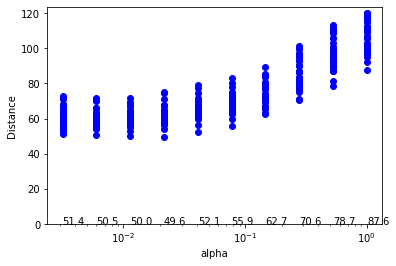

In [4]:
alphas=np.logspace(-2.5,0,10)
for a in alphas:
    distances=[]
    for k in range(30): #I repeat the process 30 times, splitting the data in half differently each time
        trainingdata=X.sample(frac=0.9, random_state=k).sort_index() #This takes frac of the data and stores it for training
        testdata=X.drop(trainingdata.index) #This takes the remainder of the data to test the model generated by the training data
        clf = linear_model.Lasso(alpha=a,fit_intercept=False,max_iter=10000) #This defines the form of the model you are trying to fit (linear_model) and the optimization method (lasso) 
        clf.fit(trainingdata,y.drop(testdata.index)) #This trains the model
        prediction=clf.predict(testdata) #This make a prediction of the testdata using the model trained on the training data
        dist=np.linalg.norm(prediction-y.drop(trainingdata.index)) #This calculates the prediction error for the testdata
        plt.plot(a,dist,'bo') #This adds one error versus alpha data point to the plot
        distances.append(dist)
    plt.text(a,0,'%.1f' % min(distances))
plt.xlabel('alpha')
plt.ylabel('Distance')
plt.xscale('log')
plt.ylim(bottom=0)
plt.savefig(trainingsetname+'_alpha.png')
plt.show()
plt.close()

y=0.9959454186003088x+-0.034941753661282604, r=0.9485929928086826, p=8.782867270694022e-57, n=112
y=0.9965036313849365x+0.7507876905307178, r=0.9334561029971102, p=8.490478560275725e-51, n=112
y=1.032683411427665x+-0.12827313160488174, r=0.9311401053044114, p=5.230659889567171e-50, n=112
y=0.9724597927949196x+0.7543480302300303, r=0.9444962066970181, p=5.329981265790774e-55, n=112
y=1.018478662260471x+0.6859837093937919, r=0.9338978150349058, p=5.958053183119525e-51, n=112
y=0.9430053980723083x+1.035413124633255, r=0.9158332065885485, p=2.1385245916773083e-45, n=112
y=0.9849239321454744x+0.7218087611709869, r=0.9346735598085377, p=3.179475244146049e-51, n=112
y=0.9969270932669517x+0.41036216584002716, r=0.9321902337878574, p=2.3119931575348153e-50, n=112
y=1.016143050360734x+-0.03683956007601097, r=0.9341155153038427, p=4.9991660198439225e-51, n=112
y=0.9810123273248538x+0.6402617271680917, r=0.9456040484698153, p=1.812369612800174e-55, n=112


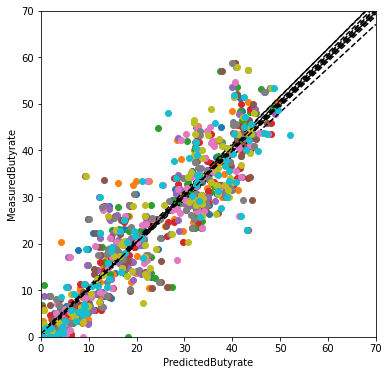

In [5]:
plt.figure(figsize=(6,6))
alpha=alphas[3]
for k in range(10):    
    trainingdata=X.sample(frac=0.9, random_state=k).sort_index()
    testdata=X.drop(trainingdata.index)
    clf = linear_model.Lasso(alpha=alpha,fit_intercept=False)
    clf.fit(trainingdata,y.drop(testdata.index))
    prediction=clf.predict(testdata)
    m,slope,r,p,stderr=sp.stats.linregress(prediction,y.drop(trainingdata.index))
    print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
    plt.plot(prediction,y.drop(trainingdata.index),linestyle='',marker='o')
    z=np.linspace(0,70,100)
    plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.xlim(0,70)
plt.ylim(0,70)
plt.xlabel('PredictedButyrate')
plt.ylabel('MeasuredButyrate')
plt.savefig(datetime.date.today().strftime("%Y_%m_%d_")+trainingsetname+'_10fcv_alpha'+'{:.1e}'.format(alpha)+'.png')
plt.show()
plt.close()

y=0.9984377558445443x+0.3807008938885126, r=0.9424165193678775, p=0.0, n=1117


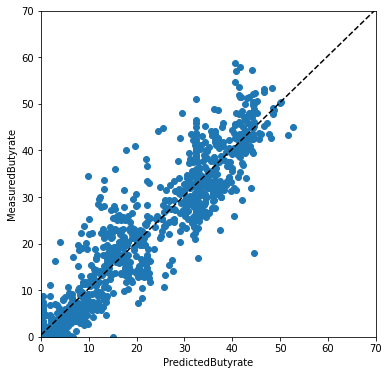

In [6]:
#Train on all of the data
plt.figure(figsize=(6,6))
alpha=alphas[3]  
trainingdata=X
testdata=X
clf = linear_model.Lasso(alpha=alpha,fit_intercept=False)
clf.fit(trainingdata,y)
prediction=clf.predict(testdata)
m,slope,r,p,stderr=sp.stats.linregress(prediction,y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
plt.plot(prediction,y,linestyle='',marker='o')
z=np.linspace(0,70,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.xlim(0,70)
plt.ylim(0,70)
plt.xlabel('PredictedButyrate')
plt.ylabel('MeasuredButyrate')
plt.savefig(datetime.date.today().strftime("%Y_%m_%d_")+trainingsetname+'_10fcv_alpha'+'{:.1e}'.format(alpha)+'.png')
plt.show()
plt.close()

In [7]:
paramDF=pd.DataFrame()
for k in range(len(variablesint)):
    paramDF.at[k,'Param']=clf.coef_[k]
    paramDF.at[k,'Variable']=variablesint[k]
paramDF.to_csv(datetime.date.today().strftime("%Y_%m_%d_")+trainingsetname+'_params_alpha'+'{:.1e}'.format(alpha)+'.csv')
joblib.dump(clf, '2020_11_02_model.joblib')

['2020_11_02_model.joblib']

/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

y=0.9952911838980181x+0.5222640960292253, r=0.9398055108822989, p=0.0, n=1117


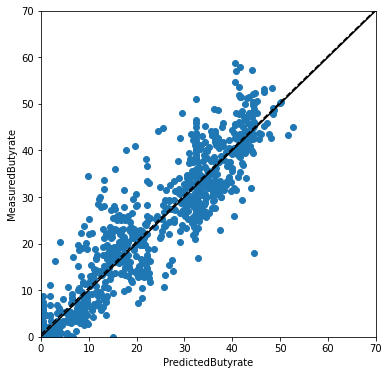

In [8]:
#Test if model trained on 1-5 member communities is predictive of various datasets
newvariables=[]
trainingdata=X
clf = linear_model.Lasso(alpha=alpha,fit_intercept=False)
clf.fit(trainingdata,y)
for species in bpbspecies:
    newvariables.append(species)
    newvariables.append(species+' OD')
dataset=validationset2[0:int(len(validationset2)/2):len(validationset2)+1]+randomset+list(set(cleanDF[cleanDF['NumSpecies']<6]['Treatment']))
datasetname='trainingdata'
plt.figure(figsize=(6,6))
testDF=cleanDF[cleanDF.Treatment.isin(dataset)]
X2=testDF[newvariables]
y2=testDF['Butyrate']
for i in range(len(phylogeny)):
    for j in range(len(phylogeny)):
        if i>j:
            if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                X2[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=testDF[phylogeny[i]+' OD']*testDF[phylogeny[j]+' OD']
                X2[phylogeny[i]+'*'+phylogeny[j]]=testDF[phylogeny[i]]*testDF[phylogeny[j]]
                X2[phylogeny[i]+' OD*'+phylogeny[j]]=testDF[phylogeny[i]+' OD']*testDF[phylogeny[j]]
                X2[phylogeny[i]+'*'+phylogeny[j]+' OD']=testDF[phylogeny[i]]*testDF[phylogeny[j]+' OD']
X2=scaler.transform(X2)
ypredict=clf.predict(X2)
m,slope,r,p,stderr=sp.stats.linregress(ypredict,y2)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
z=np.linspace(0,70,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.scatter(ypredict,y2)
plt.plot([0,70],[0,70],color='k')
plt.xlabel('PredictedButyrate')
plt.ylabel('MeasuredButyrate')
plt.xlim(0,70)
plt.ylim(0,70)
plt.savefig(datetime.date.today().strftime("%Y_%m_%d_")+trainingsetname+'_validationwith'+datasetname+'_alpha'+'{:.1e}'.format(alpha)+'.png')
plt.show()
plt.close()

/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

y=0.050415558332874075x+20.14441486081803, r=0.1138686351096974, p=0.6983125865036028, n=1117


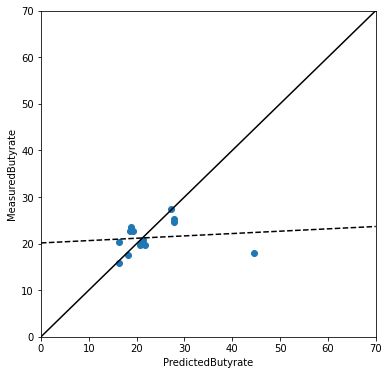

In [9]:
#Test if model trained on 1-5 member communities is predictive of various datasets
newvariables=[]
trainingdata=X
clf = linear_model.Lasso(alpha=alpha,fit_intercept=False)
clf.fit(trainingdata,y)
for species in bpbspecies:
    newvariables.append(species)
    newvariables.append(species+' OD')
dataset=['ER-RI-CC','EL-RI-CC','BL-ER-CC','FP-CH-BH-RI','PJ-BA-CC']
datasetname='problemset'
plt.figure(figsize=(6,6))
testDF=cleanDF[cleanDF.Treatment.isin(dataset)]
X2=testDF[newvariables]
y2=testDF['Butyrate']
for i in range(len(phylogeny)):
    for j in range(len(phylogeny)):
        if i>j:
            if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                X2[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=testDF[phylogeny[i]+' OD']*testDF[phylogeny[j]+' OD']
                X2[phylogeny[i]+'*'+phylogeny[j]]=testDF[phylogeny[i]]*testDF[phylogeny[j]]
                X2[phylogeny[i]+' OD*'+phylogeny[j]]=testDF[phylogeny[i]+' OD']*testDF[phylogeny[j]]
                X2[phylogeny[i]+'*'+phylogeny[j]+' OD']=testDF[phylogeny[i]]*testDF[phylogeny[j]+' OD']
X2=scaler.transform(X2)
ypredict=clf.predict(X2)
m,slope,r,p,stderr=sp.stats.linregress(ypredict,y2)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
z=np.linspace(0,70,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.scatter(ypredict,y2)
plt.plot([0,70],[0,70],color='k')
plt.xlabel('PredictedButyrate')
plt.ylabel('MeasuredButyrate')
plt.xlim(0,70)
plt.ylim(0,70)
plt.savefig(trainingsetname+'_validationwith'+datasetname+'_alpha'+'{:.1e}'.format(alpha)+'.png')
plt.show()
plt.close()

In [10]:
subDF=cleanDF[cleanDF.Treatment.isin(validationset)]
modelformDF=paramDF[paramDF['Param']>0]
    
X2=subDF[newvariables]
y2=testDF['Butyrate']
for i in range(len(phylogeny)):
    for j in range(len(phylogeny)):
        if i>j:
            if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                X2[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=subDF[phylogeny[i]+' OD']*subDF[phylogeny[j]+' OD']
                X2[phylogeny[i]+'*'+phylogeny[j]]=subDF[phylogeny[i]]*subDF[phylogeny[j]]
                X2[phylogeny[i]+' OD*'+phylogeny[j]]=subDF[phylogeny[i]+' OD']*subDF[phylogeny[j]]
                X2[phylogeny[i]+'*'+phylogeny[j]+' OD']=subDF[phylogeny[i]]*subDF[phylogeny[j]+' OD']
q=0
X2=pd.DataFrame(scaler.transform(X2),columns=variablesint)
contributionDF=pd.DataFrame()
for z in list(X2.index.values):
    for m in list(modelformDF.index.values):
        variable=modelformDF.at[m,'Variable']
        param=modelformDF.at[m,'Param']
        value=X2.at[z,variable]
        contributionDF.at[q,'Treatment']=z
        contributionDF.at[q,'Contribution']=value*param
        contributionDF.at[q,'Parameter']=variable
        q+=1

for q in list(contributionDF.index.values):
    variable=contributionDF.at[q,'Parameter']
    if '*' in variable:
        terms=variable.split('*')    
        if terms[0] in bpbspecies and terms[1] in bpbspecies:
            contributionDF.at[q,'Parameter']='Baseline'
        elif terms[0] in bpbspecies:
            contributionDF.at[q,'Parameter']=terms[1]
        elif terms[1] in bpbspecies:
            contributionDF.at[q,'Parameter']=terms[0]

reducedcontributionDF=pd.DataFrame()
q=0
for variable in list(set(contributionDF['Parameter'])):
    for treatment in list(set(contributionDF['Treatment'])):
        reducedcontributionDF.at[q,'Treatment']=treatment
        reducedcontributionDF.at[q,'Parameter']=variable
        reducedcontributionDF.at[q,'Contribution']=contributionDF[(contributionDF['Parameter']==variable)&(contributionDF['Treatment']==treatment)]['Contribution'].sum()
        q+=1

/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [11]:
reducedcontributionDF[abs(reducedcontributionDF['Contribution'])>0]

,Treatment,Parameter,Contribution
0,0.0,AC,32.171513
1,1.0,AC,32.171513
2,2.0,AC,32.171513
3,3.0,AC,32.171513
4,4.0,AC,32.171513
5,5.0,AC,32.171513
6,6.0,AC,32.171513
7,7.0,AC,32.171513
8,8.0,AC,32.171513
9,9.0,AC,32.171513


In [12]:
reducedmodelDF=pd.DataFrame()
q=0
for variable in list(set(modelformDF['Variable'])):
    reducedmodelDF.at[q,'Variable']=variable
    reducedmodelDF.at[q,'Param']=modelformDF[modelformDF['Variable']==variable]['Param'].sum()
    q+=1

In [10]:
variables=[]
for species in phylogeny:
    variables.append(species+' OD')
variables.append('Community')
newvariables=[]
for species in bpbspecies:
    newvariables.append(species)
    newvariables.append(species+' OD')

for N in [15,16,17,18,19,20,21,22]:
    newvariables=[]
    for species in bpbspecies:
        newvariables.append(species)
        newvariables.append(species+' OD')
    TOTALDF=pd.read_csv(str(N)+'MemberComms.csv',names=variables)
    for z in list(TOTALDF.index.values):
        communitylist=TOTALDF.at[z,'Community'].split('.')[0].split('_')
        mystring=''
        for value in communitylist[1:len(communitylist)+1]:
            if mystring=='':
                mystring=mystring+phylogeny[int(value)-1]
            else:
                mystring=mystring+'-'+phylogeny[int(value)-1]
        for species in phylogeny:
            if species in mystring:
                TOTALDF.at[z,species]=1
            else:
                TOTALDF.at[z,species]=0
        TOTALDF.at[z,'Community']=mystring
    variablesint=newvariables
    X=TOTALDF[newvariables]
    for i in range(len(phylogeny)):
        for j in range(len(phylogeny)):
            if i>j:
                if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                    X[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=TOTALDF[phylogeny[i]+' OD']*TOTALDF[phylogeny[j]+' OD']
                    variablesint.append(phylogeny[i]+' OD*'+phylogeny[j]+' OD')
                    X[phylogeny[i]+'*'+phylogeny[j]]=TOTALDF[phylogeny[i]]*TOTALDF[phylogeny[j]]
                    variablesint.append(phylogeny[i]+'*'+phylogeny[j])
                    X[phylogeny[i]+' OD*'+phylogeny[j]]=TOTALDF[phylogeny[i]+' OD']*TOTALDF[phylogeny[j]]
                    variablesint.append(phylogeny[i]+' OD*'+phylogeny[j])
                    X[phylogeny[i]+'*'+phylogeny[j]+' OD']=TOTALDF[phylogeny[i]]*TOTALDF[phylogeny[j]+' OD']
                    variablesint.append(phylogeny[i]+'*'+phylogeny[j]+' OD')
    X=pd.DataFrame(scaler.transform(X))
    butyrate=clf.predict(X)
    TOTALDF['PredictedButyrate']=butyrate
    TOTALDF[variables+['PredictedButyrate']].to_csv(str(N)+'MemberComms_But.csv')

/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [18]:
variables=[]
for species in phylogeny:
    variables.append(species+' OD')
variables.append('Community')
newvariables=[]
bpbODvars=[]
ODvars=[]
for species in bpbspecies:
    newvariables.append(species)
    newvariables.append(species+' OD')
    bpbODvars.append(species+' OD')
for species in phylogeny:
    ODvars.append(species+' OD')
numbins=10
for N in [11,12,13,14,15,16]:
    TOTALDF=pd.read_csv(str(N)+'MemberComms.csv',names=variables)
    bins=int(len(TOTALDF)/numbins)
    print(bins)
    for k in range(numbins):
        newvariables=[]
        for species in bpbspecies:
            newvariables.append(species)
            newvariables.append(species+' OD')
        print(k*bins)
        subDF=TOTALDF[TOTALDF.index.isin(range(k*bins,(k+1)*bins))]
        print('Start Comm Names')
        for z in list(subDF.index.values):
            communitylist=subDF.at[z,'Community'].split('.')[0].split('_')
            mystring=''
            for value in communitylist[1:len(communitylist)+1]:
                if mystring=='':
                    mystring=mystring+phylogeny[int(value)-1]
                else:
                    mystring=mystring+'-'+phylogeny[int(value)-1]
            for species in phylogeny:
                if species in mystring:
                    subDF.at[z,species]=1
                else:
                    subDF.at[z,species]=0
            subDF.at[z,'Community']=mystring
        print((k+1)*bins)
        variablesint=newvariables
        X=subDF[newvariables]
        for i in range(len(phylogeny)):
            for j in range(len(phylogeny)):
                if i>j:
                    if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                        X[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=subDF[phylogeny[i]+' OD']*subDF[phylogeny[j]+' OD']
                        variablesint.append(phylogeny[i]+' OD*'+phylogeny[j]+' OD')
                        X[phylogeny[i]+'*'+phylogeny[j]]=subDF[phylogeny[i]]*subDF[phylogeny[j]]
                        variablesint.append(phylogeny[i]+'*'+phylogeny[j])
                        X[phylogeny[i]+' OD*'+phylogeny[j]]=subDF[phylogeny[i]+' OD']*subDF[phylogeny[j]]
                        variablesint.append(phylogeny[i]+' OD*'+phylogeny[j])
                        X[phylogeny[i]+'*'+phylogeny[j]+' OD']=subDF[phylogeny[i]]*subDF[phylogeny[j]+' OD']
                        variablesint.append(phylogeny[i]+'*'+phylogeny[j]+' OD')
        X=pd.DataFrame(scaler.transform(X))
        butyrate=clf.predict(X)
        subDF['PredictedButyrate']=butyrate
        subDF['TotalOD']=subDF[ODvars].sum(axis=1)
        subDF['BPBOD']=subDF[bpbODvars].sum(axis=1)
        subDF.to_csv(str(N)+'MemberComms_'+str(k)+'.csv')

445740
0
Start Comm Names
445740


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

445740
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


891480


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

891480
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1337220


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1337220
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1782960


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1782960
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2228700


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2228700
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


2674440


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

2674440
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3120180


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3120180
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3565920


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3565920
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4011660


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

4011660
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4457400


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

520028
0
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


520028


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

520028
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1040056


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1040056
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1560084


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1560084
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2080112


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2080112
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2600140


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2600140
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3120168


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3120168
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3640196


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3640196
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4160224


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

4160224
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4680252


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

4680252
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5200280


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

520030
0
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


520030


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

520030
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1040060


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1040060
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1560090


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1560090
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2080120


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2080120
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2600150


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2600150
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3120180


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3120180
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3640210


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3640210
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4160240


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

4160240
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4680270


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

4680270
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5200300


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

445739
0
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


445739


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

445739
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


891478


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

891478
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1337217


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1337217
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1782956


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1782956
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2228695


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2228695
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2674434


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2674434
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3120173


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3120173
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3565912


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

3565912
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4011651


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

4011651
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4457390


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

326876
0
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


326876


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

326876
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


653752


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

653752
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


980628


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

980628
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1307504


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1307504
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1634380


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1634380
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1961256


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1961256
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2288132


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2288132
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2615008


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2615008
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2941884


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

2941884
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3268760


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

204297
0
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


204297


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

204297
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


408594


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

408594
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


612891


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

612891
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


817188


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

817188
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1021485


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1021485
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1225782


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1225782
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1430079


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1430079
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1634376


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1634376
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1838673


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

1838673
Start Comm Names


/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/romeroroot/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2042970


/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rlclark2@ad.wisc.edu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [20]:
bpbODvars=[]
ODvars=[]
for species in bpbspecies:
    bpbODvars.append(species+' OD')
for species in phylogeny:
    ODvars.append(species+' OD')
for N in [1,2,3,4,5,6,7,8,9,10,17,18,19,20,21,22,23,24,25]:
    TOTALDF=pd.read_csv(str(N)+'MemberComms_But.csv',index_col=0)
    TOTALDF['TotalOD']=TOTALDF[ODvars].sum(axis=1)
    TOTALDF['BPBOD']=TOTALDF[bpbODvars].sum(axis=1)
    TOTALDF.to_csv(str(N)+'MemberComms_But.csv')

/home/romeroroot/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


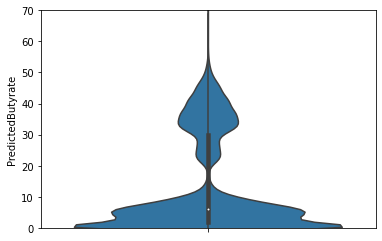

In [24]:
tempDF=pd.read_csv('8MemberComms_But.csv',index_col=0)
sns.violinplot(y=tempDF['PredictedButyrate'])
plt.ylim(0,70)
plt.show()
plt.close()

1
2
3
4
5
6
7


/home/romeroroot/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


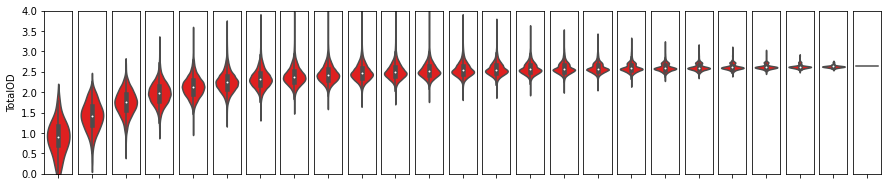

In [37]:
fig,ax=plt.subplots(1,25,figsize=(15,3))
for N in range(1,26):
    if N>10 and N<17:
        frames=[]
        for k in range(10):
            tempDF=pd.read_csv(str(N)+'MemberComms_'+str(k)+'.csv',index_col=0)
            frames.append(tempDF)
        tempDF=pd.concat(frames)
    else:
        tempDF=pd.read_csv(str(N)+'MemberComms_But.csv',index_col=0)
    sns.violinplot(y=tempDF['TotalOD'],ax=ax[N-1],color='r')
    ax[N-1].set_ylim(0,4)
    if N>1:
        ax[N-1].set_yticks([])
        ax[N-1].set_ylabel('')
    print(N)
plt.savefig('ODvsComplexity.pdf')
plt.show()
plt.close()

1
2
3
4
5
6
7


/home/romeroroot/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


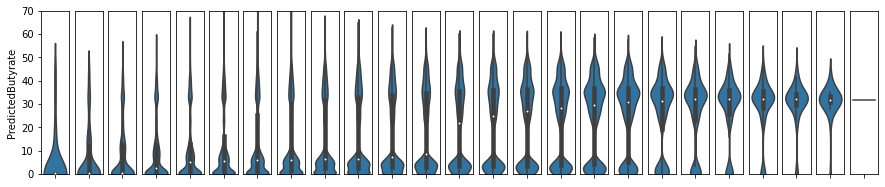

In [36]:
fig,ax=plt.subplots(1,25,figsize=(15,3))
for N in range(1,26):
    if N>10 and N<17:
        frames=[]
        for k in range(10):
            tempDF=pd.read_csv(str(N)+'MemberComms_'+str(k)+'.csv',index_col=0)
            frames.append(tempDF)
        tempDF=pd.concat(frames)
    else:
        tempDF=pd.read_csv(str(N)+'MemberComms_But.csv',index_col=0)
    sns.violinplot(y=tempDF['PredictedButyrate'],ax=ax[N-1])
    ax[N-1].set_ylim(0,70)
    if N>1:
        ax[N-1].set_yticks([])
        ax[N-1].set_ylabel('')
    print(N)
plt.savefig('ButyratevsComplexity.pdf')
plt.show()
plt.close()

1
2
3
4
5
6
7


/home/romeroroot/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


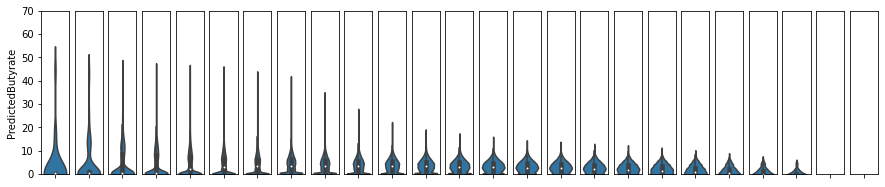

In [39]:
fig,ax=plt.subplots(1,25,figsize=(15,3))
for N in range(1,26):
    if N>10 and N<17:
        frames=[]
        for k in range(10):
            tempDF=pd.read_csv(str(N)+'MemberComms_'+str(k)+'.csv',index_col=0)
            frames.append(tempDF)
        tempDF=pd.concat(frames)
    else:
        tempDF=pd.read_csv(str(N)+'MemberComms_But.csv',index_col=0)
    sns.violinplot(y=tempDF[tempDF['AC OD']==0]['PredictedButyrate'],ax=ax[N-1])
    ax[N-1].set_ylim(0,70)
    if N>1:
        ax[N-1].set_yticks([])
        ax[N-1].set_ylabel('')
    print(N)
plt.savefig('ButyratevsComplexity_MinusAC.pdf')
plt.show()
plt.close()

1
2
3
4
5
6
7


/home/romeroroot/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


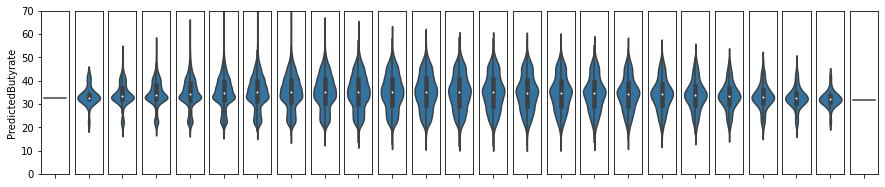

In [40]:
fig,ax=plt.subplots(1,25,figsize=(15,3))
for N in range(1,26):
    if N>10 and N<17:
        frames=[]
        for k in range(10):
            tempDF=pd.read_csv(str(N)+'MemberComms_'+str(k)+'.csv',index_col=0)
            frames.append(tempDF)
        tempDF=pd.concat(frames)
    else:
        tempDF=pd.read_csv(str(N)+'MemberComms_But.csv',index_col=0)
    sns.violinplot(y=tempDF[tempDF['AC OD']!=0]['PredictedButyrate'],ax=ax[N-1])
    ax[N-1].set_ylim(0,70)
    if N>1:
        ax[N-1].set_yticks([])
        ax[N-1].set_ylabel('')
    print(N)
plt.savefig('ButyratevsComplexity_PlusAC.pdf')
plt.show()
plt.close()

In [18]:
statsDF=pd.DataFrame()
for N in range(1,26):
    print(N)
    if N>10 and N<17:
        frames=[]
        for k in range(10):
            tempDF=pd.read_csv(str(N)+'MemberComms_'+str(k)+'.csv',index_col=0)
            frames.append(tempDF)
        tempDF=pd.concat(frames)
    else:
        tempDF=pd.read_csv(str(N)+'MemberComms_But.csv',index_col=0)
    statsDF.at[N,'Complexity']=N
    statsDF.at[N,'Butyrate_Median']=tempDF['PredictedButyrate'].median()
    statsDF.at[N,'Butyrate_Mean']=tempDF['PredictedButyrate'].mean()
    statsDF.at[N,'Butyrate_Std']=tempDF['PredictedButyrate'].std()
    statsDF.at[N,'Butyrate_TopQuart']=np.percentile(tempDF['PredictedButyrate'],75)
    statsDF.at[N,'Butyrate_TopTen']=np.percentile(tempDF['PredictedButyrate'],90)
    statsDF.at[N,'Butyrate_BottomTen']=np.percentile(tempDF['PredictedButyrate'],10)
    statsDF.at[N,'Butyrate_Top5']=np.percentile(tempDF['PredictedButyrate'],95)
    statsDF.at[N,'Butyrate_Bottom5']=np.percentile(tempDF['PredictedButyrate'],5)
    statsDF.at[N,'Butyrate_Top1']=np.percentile(tempDF['PredictedButyrate'],99)
    statsDF.at[N,'Butyrate_Bottom1']=np.percentile(tempDF['PredictedButyrate'],1)
    statsDF.at[N,'TotalOD_Median']=tempDF['TotalOD'].median()
    statsDF.at[N,'TotalOD_Mean']=tempDF['TotalOD'].mean()
    statsDF.at[N,'TotalOD_Std']=tempDF['TotalOD'].std()
    statsDF.at[N,'TotalOD_TopQuart']=np.percentile(tempDF['TotalOD'],75)
    statsDF.at[N,'TotalOD_TopTen']=np.percentile(tempDF['TotalOD'],90)
    statsDF.at[N,'TotalOD_BottomTen']=np.percentile(tempDF['TotalOD'],10)
    statsDF.at[N,'TotalOD_Top5']=np.percentile(tempDF['TotalOD'],95)
    statsDF.at[N,'TotalOD_Bottom5']=np.percentile(tempDF['TotalOD'],5)
    statsDF.at[N,'TotalOD_Top1']=np.percentile(tempDF['TotalOD'],99)
    statsDF.at[N,'TotalOD_Bottom1']=np.percentile(tempDF['TotalOD'],1)
    statsDF.at[N,'BPBOD_Median']=tempDF['BPBOD'].median()
    statsDF.at[N,'BPBOD_Mean']=tempDF['BPBOD'].mean()
    statsDF.at[N,'BPBOD_Std']=tempDF['BPBOD'].std()
    statsDF.at[N,'BPBOD_TopQuart']=np.percentile(tempDF['BPBOD'],75)
    statsDF.at[N,'BPBOD_TopTen']=np.percentile(tempDF['BPBOD'],90)
    statsDF.at[N,'BPBOD_BottomTen']=np.percentile(tempDF['BPBOD'],10)
    statsDF.at[N,'BPBOD_Top5']=np.percentile(tempDF['BPBOD'],95)
    statsDF.at[N,'BPBOD_Bottom5']=np.percentile(tempDF['BPBOD'],5)
    statsDF.at[N,'BPBOD_Top1']=np.percentile(tempDF['BPBOD'],99)
    statsDF.at[N,'BPBOD_Bottom1']=np.percentile(tempDF['BPBOD'],1)
statsDF.to_csv('2020_11_12_statsDF.csv')

1
2
3
4
5
6
7
8


/home/romeroroot/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


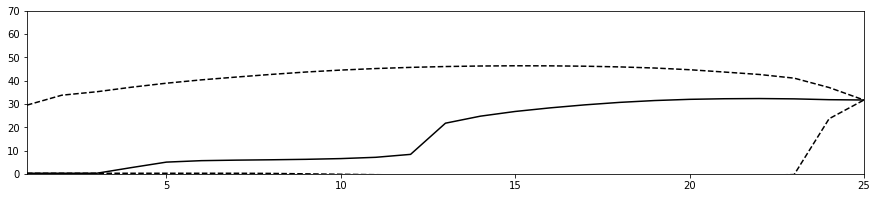

In [26]:
plt.figure(figsize=(15,3))
plt.plot(statsDF['Complexity'],statsDF['Butyrate_Median'],color='k')
plt.plot(statsDF['Complexity'],statsDF['Butyrate_Top5'],color='k',linestyle='--')
plt.plot(statsDF['Complexity'],statsDF['Butyrate_Bottom5'],color='k',linestyle='--')
plt.ylim(0,70)
plt.xlim(1,25)
plt.savefig('ButStats.pdf')
plt.show()
plt.close()

In [29]:
statsDF['TotalOD_Top5']

1     1.477940
2     1.972300
3     2.248336
4     2.433515
5     2.585162
6     2.691950
7     2.760353
8     2.803239
9     2.832982
10    2.851471
11    2.861442
12    2.865535
13    2.865109
14    2.860999
15    2.853210
16    2.842419
17    2.828663
18    2.811402
19    2.790108
20    2.770384
21    2.755053
22    2.741500
23    2.737149
24    2.693177
25    2.635623
Name: TotalOD_Top5, dtype: float64

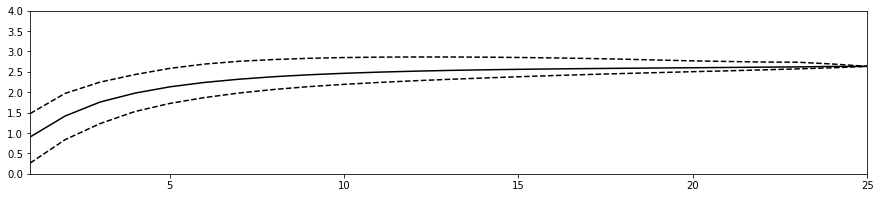

In [27]:
plt.figure(figsize=(15,3))
plt.plot(statsDF['Complexity'],statsDF['TotalOD_Median'],color='k')
plt.plot(statsDF['Complexity'],statsDF['TotalOD_Top5'],color='k',linestyle='--')
plt.plot(statsDF['Complexity'],statsDF['TotalOD_Bottom5'],color='k',linestyle='--')
plt.ylim(0,4)
plt.xlim(1,25)
plt.savefig('TotalODStats.pdf')
plt.show()
plt.close()

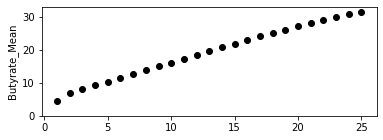

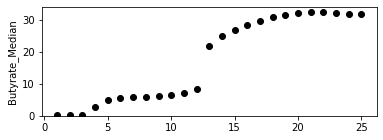

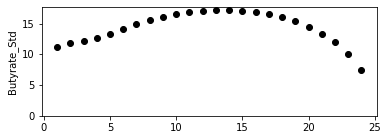

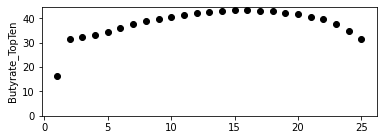

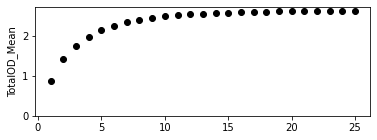

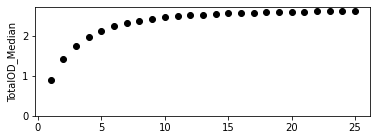

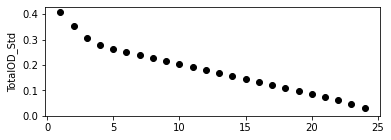

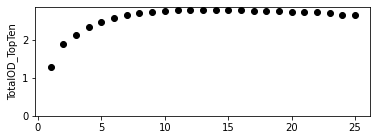

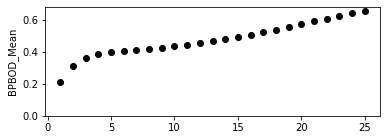

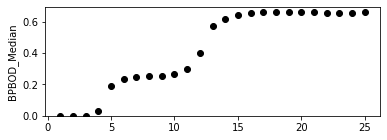

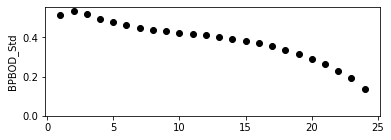

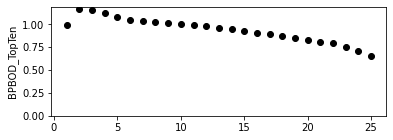

In [12]:
for var in ['Butyrate_Mean','Butyrate_Median','Butyrate_Std','Butyrate_TopTen','TotalOD_Mean','TotalOD_Median','TotalOD_Std','TotalOD_TopTen','BPBOD_Mean','BPBOD_Median','BPBOD_Std','BPBOD_TopTen']:
    plt.figure(figsize=(6,2))
    plt.scatter(x=statsDF['Complexity'],y=statsDF[var],color='k')
    plt.ylabel(var)
    plt.ylim(bottom=0)
    plt.show()
    plt.close()